In [16]:
import os # to change pwd
import pandas as pd # to work with dataframes
# import numpy as np # to perform numeric operations

os.chdir('D:\\Downloads\\Datasets\\NPTEL')

In [17]:
cars_data = pd.read_csv('Toyota.csv',index_col=0, na_values=["??","????"])
cars_data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015


In [18]:
cars_data2 = cars_data.copy()

In [19]:
cars_data2

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015


## Frequency Table

pandas.crosstab()

* To compute a simple cross-tabulation of one, two (or more)
factors

* By default computes a frequency table of the factors

In [20]:
pd.crosstab(index=cars_data2['FuelType'], 
            columns='count', dropna=True)

col_0,count
FuelType,
CNG,15
Diesel,144
Petrol,1177


## Two-way tables

pandas.crosstab()

* To look at the frequency distribution of gearbox types
with respect to different fuel types of the cars

In [21]:
pd.crosstab(index=cars_data2['Automatic'], 
            columns=cars_data2['FuelType'], 
            dropna=True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,15,144,1104
1,0,0,73


## Two-way tables - joint probability

pandas.crosstab()

* Joint probability is the likelihood of two independent events
happening at the same time

In [22]:
pd.crosstab(index=cars_data2['Automatic'], 
            columns=cars_data2['FuelType'], 
            normalize=True,
            dropna=True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,0.011228,0.107784,0.826347
1,0.000000,0.000000,0.054641


## Two-way tables - marginal probability

pandas.crosstab()

* Marginal probability is the probability of the occurrence of
the single event

In [24]:
pd.crosstab(index=cars_data2['Automatic'], 
            columns=cars_data2['FuelType'], 
            margins=True,
            normalize=True,
            dropna=True)

FuelType,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.011228,0.107784,0.826347,0.945359
1,0.000000,0.000000,0.054641,0.054641
All,0.011228,0.107784,0.880988,1.000000


## Two-way tables - marginal probability

pandas.crosstab()

* Conditional probability is the probability of an event (A ),
given that another event ( B ) has already occurred
* Given the type of gear box, probability of different fuel type

In [25]:
pd.crosstab(index=cars_data2['Automatic'], 
            columns=cars_data2['FuelType'], 
            margins=True,
            dropna=True,
            normalize='index')

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,0.011876,0.114014,0.874109
1,0.000000,0.000000,1.000000
All,0.011228,0.107784,0.880988


In [26]:
pd.crosstab(index=cars_data2['Automatic'], 
            columns=cars_data2['FuelType'], 
            margins=True,
            dropna=True,
            normalize='columns')

FuelType,CNG,Diesel,Petrol,All
Automatic,,,,
0,1.0,1.0,0.937978,0.945359
1,0.0,0.0,0.062022,0.054641


## Correlation

* the strength of association
between two variables

* Visual representation of correlation:
Scatter plots

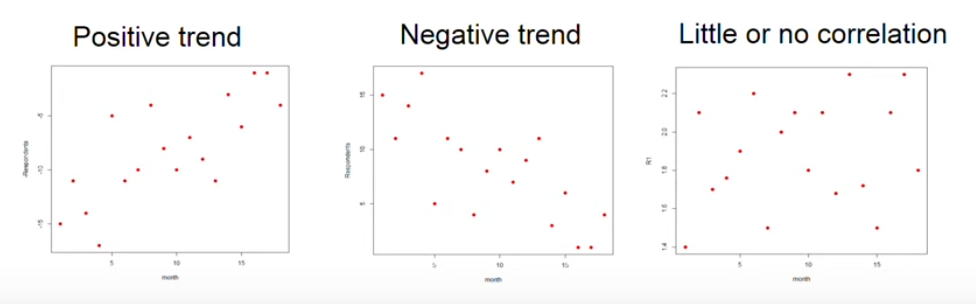

DataFrame.corr(self, method='pearson’)

* To compute pairwise correlation of columns excluding NA/null
values
* Excluding the categorical variables to find the Pearson’s
correlation

In [28]:
numerical_data = cars_data2.select_dtypes(exclude=[object])
numerical_data.shape

(1436, 8)

In [30]:
corr_matrix = numerical_data.corr()
corr_matrix

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
Price,1.000000,-0.878407,-0.574720,0.309902,0.112041,0.033081,0.165067,0.581198
Age,-0.878407,1.000000,0.512735,-0.157904,-0.099659,0.032573,-0.120706,-0.464299
KM,-0.574720,0.512735,1.000000,-0.335285,-0.093825,-0.081248,0.299993,-0.026271
HP,0.309902,-0.157904,-0.335285,1.000000,0.064749,0.013755,0.053758,0.086737
MetColor,0.112041,-0.099659,-0.093825,0.064749,1.000000,-0.013973,0.029189,0.057142
Automatic,0.033081,0.032573,-0.081248,0.013755,-0.013973,1.000000,-0.069321,0.057249
CC,0.165067,-0.120706,0.299993,0.053758,0.029189,-0.069321,1.000000,0.651450
Weight,0.581198,-0.464299,-0.026271,0.086737,0.057142,0.057249,0.651450,1.000000
